# Importar librerías

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# Importar datos

In [287]:
df = pd.read_csv('Datasets/datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.drop(['employee_id'], axis=1, inplace=True)

In [288]:
df.shape

(4401, 26)

# Tratamiento de valores atípicos

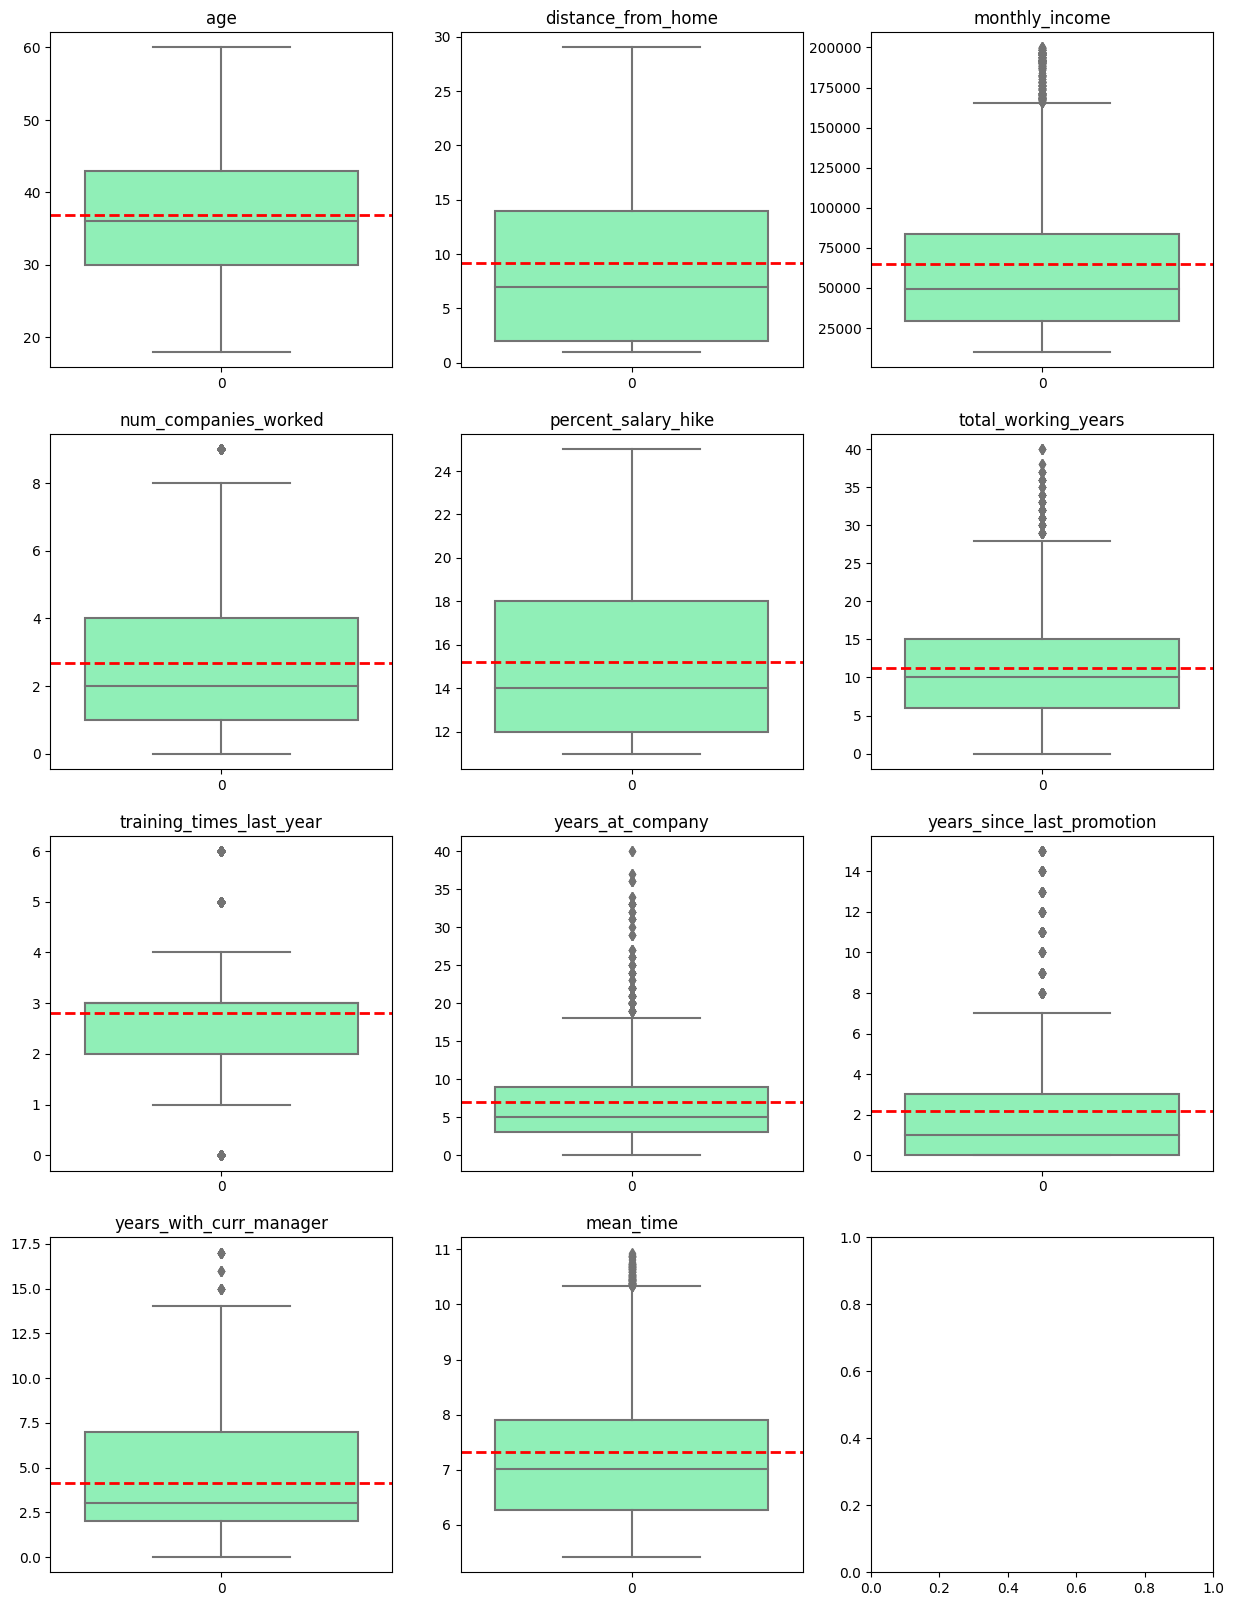

In [289]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

Durante el análisis exploratorio de las variables numéricas frente a la variable objetivo, se evidencia una diferencia de distribución dependiendo de si el emplado abandonó o no. Por esto, se decidió imputar valores atípicos con la técnica de mediana por grupo, donde los grupos serían si el empleado abandonó o no.

In [303]:
df2 = df.copy()

### Ingresos mensuales

In [305]:
upper_mi, lower_mi = utils.outlier_IQR(df2, 'monthly_income', 1)

IQR is: 54690.0
Threshold is: 54690.0
Lower bound is: -25580.0
Upper bound is: 138490.0
total number of outliers are: 437


In [292]:
df2 = utils.imputar_outliers(df2, 'monthly_income', lower_mi, upper_mi)

### Total de años trabajando

In [306]:
upper_twy, lower_twy = utils.outlier_IQR(df2, 'total_working_years', 1)

IQR is: 9.0
Threshold is: 9.0
Lower bound is: -3.0
Upper bound is: 24.0
total number of outliers are: 336


In [294]:
df2 = utils.imputar_outliers(df2, 'total_working_years', lower_twy, upper_twy)

### Años en la compañía

In [307]:
upper_yac, lower_yac = utils.outlier_IQR(df2, 'years_at_company', 1)

IQR is: 6.0
Threshold is: 6.0
Lower bound is: -3.0
Upper bound is: 15.0
total number of outliers are: 412


In [296]:
df2 = utils.imputar_outliers(df2, 'years_at_company', lower_yac, upper_yac)

### Años desde la última promoción

In [308]:
upper_yslp, lower_yslp = utils.outlier_IQR(df2, 'years_since_last_promotion', 1)

IQR is: 3.0
Threshold is: 3.0
Lower bound is: -3.0
Upper bound is: 6.0
total number of outliers are: 548


In [298]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_yslp, upper_yslp)

### Años con el jefe actual

In [309]:
upper_ywcm, lower_ywcm = utils.outlier_IQR(df2, 'years_with_curr_manager', 1)

IQR is: 5.0
Threshold is: 5.0
Lower bound is: -3.0
Upper bound is: 12.0
total number of outliers are: 99


In [300]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_ywcm, upper_ywcm)

### Tiempo promedio de trabao al día del empleado

In [310]:
upper_mt, lower_mt = utils.outlier_IQR(df2, 'mean_time', 1)

IQR is: 1.6218999999999992
Threshold is: 1.6218999999999992
Lower bound is: 4.656500000000001
Upper bound is: 9.522199999999998
total number of outliers are: 465


In [284]:
df2 = utils.imputar_outliers(df2, 'mean_time', lower_mt, upper_mt)

# Revisar valores atípicos nuevamente

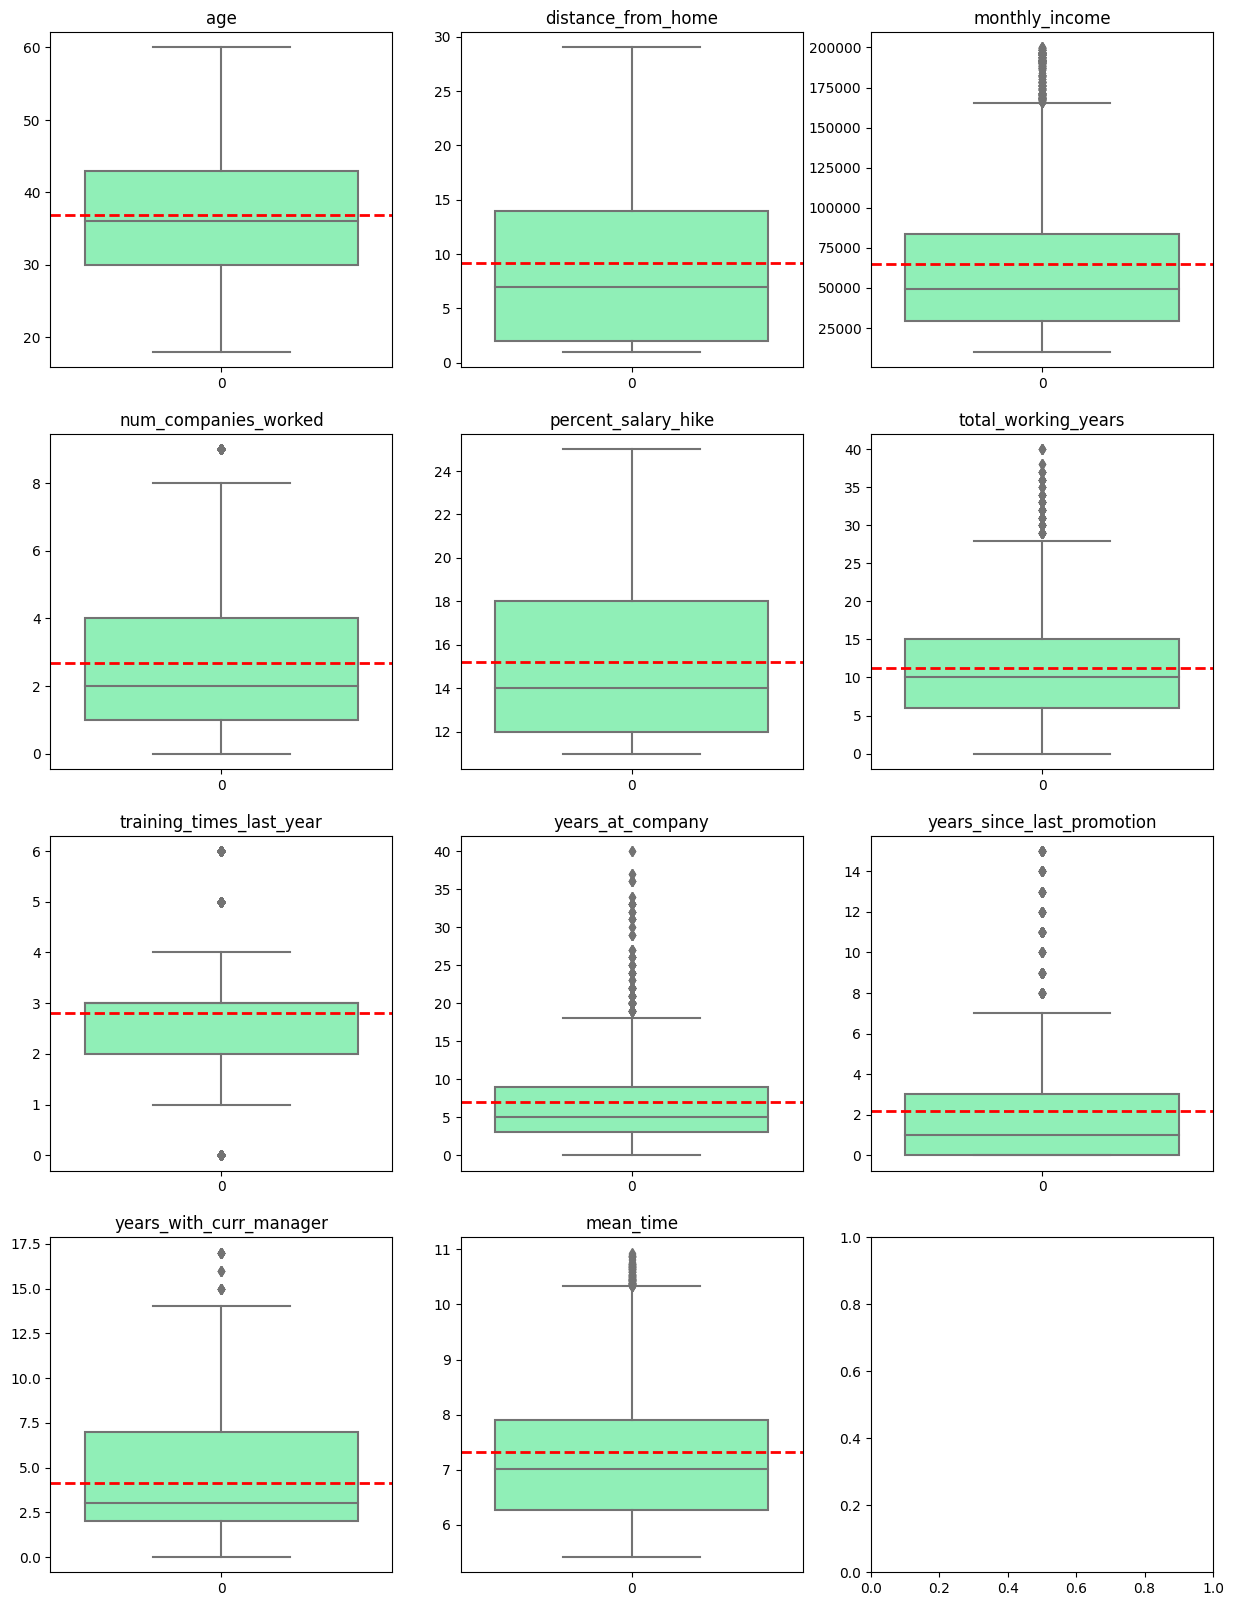

In [312]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df2.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df2[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df2[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)